<a href="https://colab.research.google.com/github/MonitSharma/Learn-Quantum-Computing-with-Qiskit/blob/main/Phase_Kickback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase Kickback

## Exploring the CNOT-Gate

In the previous tutorial, we saw a very basic results with the CNOT gate. In this tutorial we will explore some more interesting results because of it.

We know that we could entangle the two qubits by placing the control qubit in the state $|+⟩$

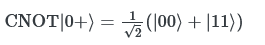


But what happens if we have another superposition?

In [3]:
from qiskit import QuantumCircuit
from qiskit.primitives import Sampler, Estimator
from math import pi
import numpy as np
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex

Let's make a circuit for that:

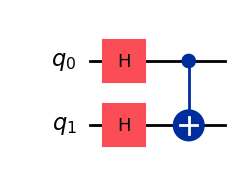

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw('mpl')

In the circuit above, we have the CNOT acting on the state:

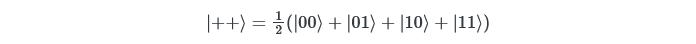


Since CNOT swaps the amplitudes of $|01⟩$ and $|11\rangle$, we see no change:

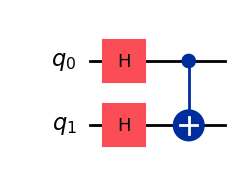

In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
display(qc.draw('mpl'))  # `display` is a command for Jupyter notebooks
                    # similar to `print`, but for rich content

# Let's see the result
final_state = Statevector.from_instruction(qc)


In [5]:
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))


<IPython.core.display.Latex object>

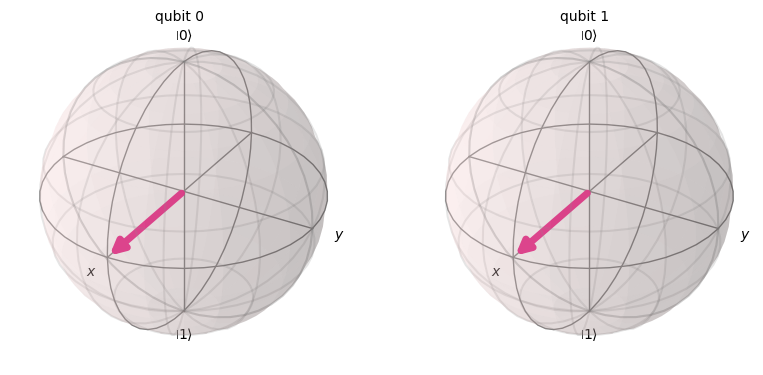

In [6]:
plot_bloch_multivector(final_state)

Let’s put the target qubit in the state $|-⟩$ , so it has a negative phase:

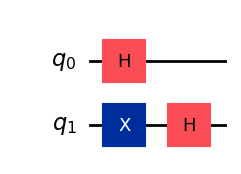

In [7]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw('mpl')

This creates the state:

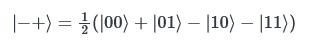

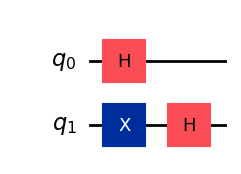

In [8]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
display(qc.draw('mpl'))
# See the result
final_state = Statevector.from_instruction(qc)



In [9]:
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))


<IPython.core.display.Latex object>

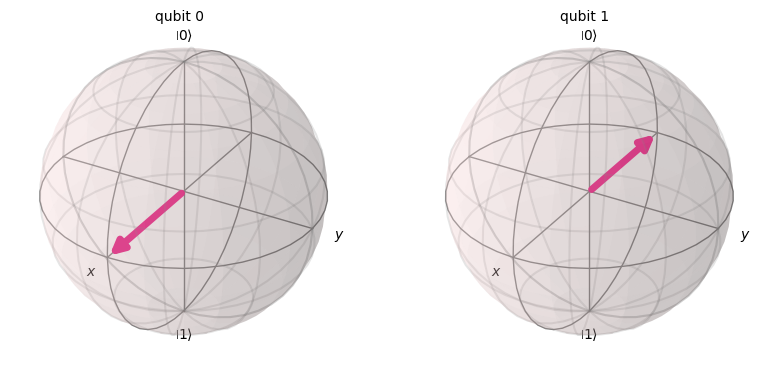

In [10]:
plot_bloch_multivector(final_state)

If the CNOT acts on this state, we will swap the amplitudes of $|01\rangle$ and $|11⟩$, resulting in the state:

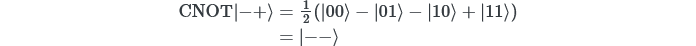

This is interesting, because it affects the state of the control qubit while leaving the state of the target qubit unchanged.

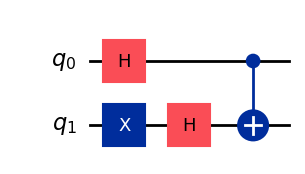

In [11]:
qc.cx(0,1)
display(qc.draw('mpl'))

final_state = Statevector.from_instruction(qc)


In [12]:
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))


<IPython.core.display.Latex object>

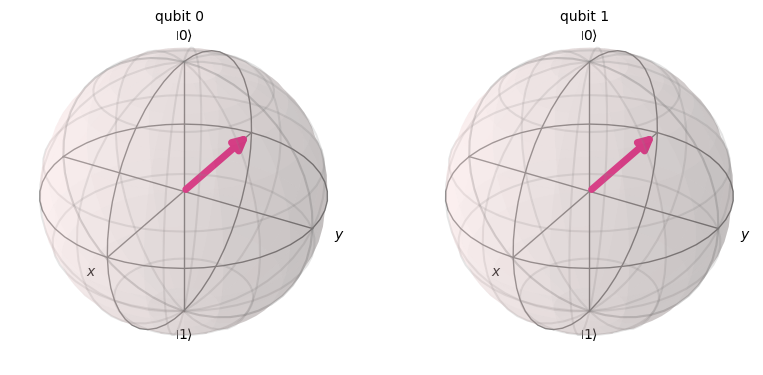

In [13]:
plot_bloch_multivector(final_state)

If you remember the H-gate transforms $|+⟩ → |0⟩$ and $|-⟩ → |1⟩$, we can see that wrapping a CNOT in H-gates has the equivalent behaviour of a CNOT acting in the opposite direction:


identities_1.svg

We can verify this using Qiskit's Aer simulator:

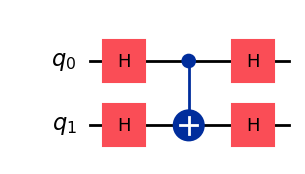

In [14]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw('mpl'))



unitary = Operator(qc)


In [15]:
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

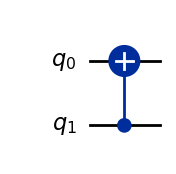

In [17]:
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw('mpl'))


unitary = Operator(qc)


In [18]:
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

This identity is an example of phase kickback, which leads us neatly on to the next section...

## Phase Kickback

### Explaining the CNOT Circuit Identity

In the previous section we saw this identity:


identities_1.svg

This is an example of kickback (or, phase kickback ) which is very important and is used in almost every quantum algorithm. Kickback is where the eigenvalue added by a gate to a qubit is ‘kicked back’ into a different qubit via a controlled operation. For example, we saw that performing an X-gate on a $|-⟩$ qubit gives it the phase $-1$:


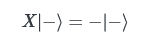

When our control qubit is in either $|0⟩$ or $|1⟩$, this phase affects the whole state, however it is a global phase and has no observable effects:

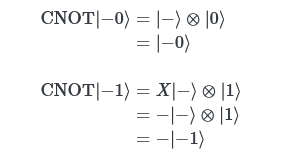

The interesting effect is when our control qubit is in superposition. The component of the control qubit that lies in the direction of $|1⟩$ applies this phase factor to the corresponding target qubit. This applied phase factor in turn introduces a relative phase into the control qubit:

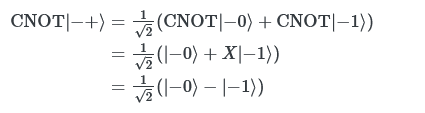

This can then be written as the two separable qubit states:

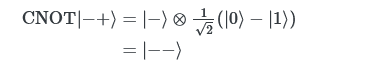

Wrapping the CNOT in H-gates transforms the qubits from the computational basis to the $|+\rangle , |-\rangle$ basis, where we see this effect. This identity is very useful in hardware, since some hardwares only allow for CNOTs in one direction between two specific qubits. We can use this identity to overcome this problem and allow CNOTs in both directions

### Kickback with the T-gate

Let’s look at another controlled operation, the controlled-T gate:

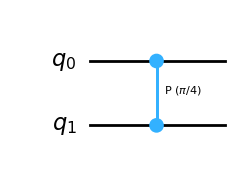

In [19]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
qc.draw('mpl')

The T-gate has the matrix:

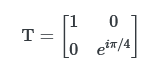

And the controlled-T gate has the matrix:

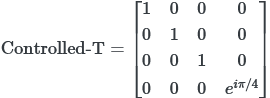

We can verify this using Qiskit's Aer simulator:

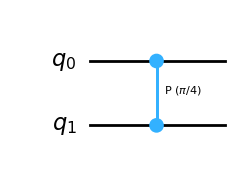

In [20]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
display(qc.draw('mpl'))
# See Results:
unitary = Operator(qc)


In [21]:
array_to_latex(unitary, prefix="\\text{Controlled-T} = \n")

<IPython.core.display.Latex object>

More generally, we can find the matrix of any controlled-U operation using the rule:

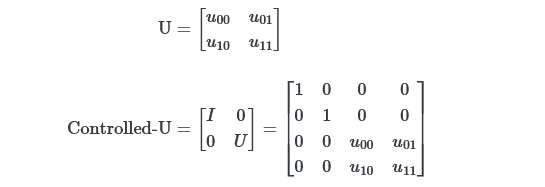

Or, using Qiskit's qubit ordering:


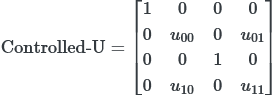

If we apply the T-gate to a qubit in the state $|1⟩$ , we add a phase of $e^{\iota \pi/4}$ to this qubit:

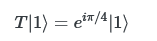

This is global phase and is unobservable. But if we control this operation using another qubit in the $|+\rangle$ state, the phase is no longer global but relative, which changes the relative phase in our control qubit:

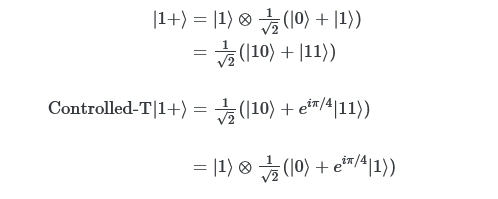

This has the effect of rotating our control qubit around the Z-axis of the Bloch sphere, while leaving the target qubit unchanged. Let's see this in Qiskit:

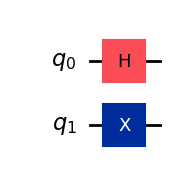

In [22]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw('mpl'))
# See Results:
final_state = Statevector.from_instruction(qc)


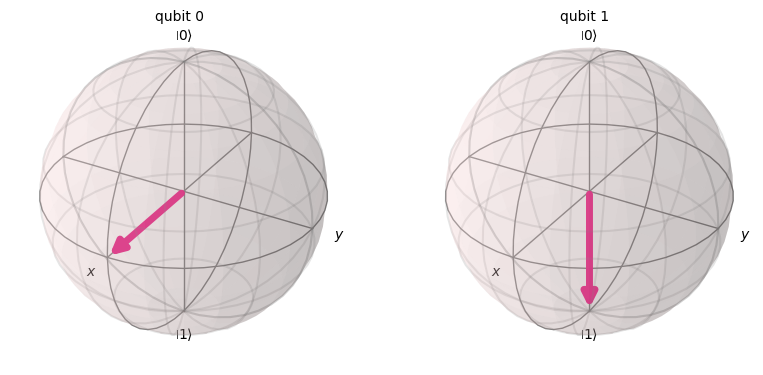

In [23]:
plot_bloch_multivector(final_state)

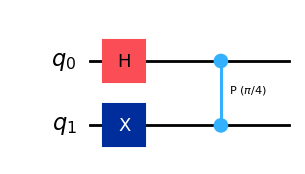

In [24]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
# Add Controlled-T
qc.cp(pi/4, 0, 1)
display(qc.draw('mpl'))
# See Results:
final_state = Statevector.from_instruction(qc)


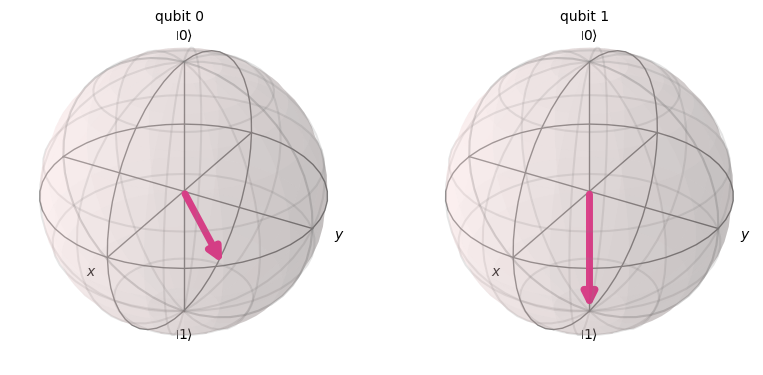

In [25]:
plot_bloch_multivector(final_state)

We can see the leftmost qubit has been rotated by $\pi/4$ around the Z-axis of the Bloch sphere as expected. After exploring this behaviour, it may become clear why Qiskit draws the controlled-Z rotation gates in this symmetrical fashion (two controls instead of a control and a target). There is no clear control or target qubit for all cases.
